
<span style="color:#000000; font-size:1.2em; text-align:right">Data Scientist II Technical Challenge</span>

<span style="color:#e01760; font-size:2em; align=center">Part 1: Exploratory Data Analysis</span>

<font color="#6E6E6E" align="center">Cristina M. Sánchez Maíz | csmaiz@gmail.com | [LinkedIn](https://www.linkedin.com/in/csmaiz/) </font> 

You will be provided with a dataset containing information about Customer transactions.

**Tasks**:
- Load the dataset and perform basic data cleaning (e.g., handling missing values, correcting data types).
- Conduct exploratory data analysis to understand the main characteristics of the data.
- Visualize key insights using appropriate plots (e.g., histograms, bar charts, scatter plots).

**Deliverables**
- Summary statistics of the dataset.
- At least three different visualizations with explanations.

# Import libraries

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

In [2]:
from constants import *

In [148]:
from IPython.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

# Load the dataset

In [3]:
# Run a Linux command to get the header and the first two rows of the dataset
! head -n3 ./datasets/customer_transactions_with_errors.csv 

head: ./datasets/customer_transactions_with_errors.csv: No such file or directory


In [4]:
df_transactions = pd.read_csv('../input/customer_transactions_with_errors.csv',
                      dtype={'payment_method':'category',
                             'product_category':'category'
                            }, delimiter=",")
print("Number of columns: ", df_transactions.shape[1])
print("Number of rows: ", df_transactions.shape[0])

Number of columns:  8
Number of rows:  1010


# Explore columns

In [5]:
df_transactions.head(10) 

,customer_id,transaction_id,transaction_date,amount,product_category,payment_method,customer_age,customer_income
0,74,1001,NaN,NaN,groceries,debit card,62,47401.75
1,2,1002,2024-04-06,1493.880878,Clothing,PayPal,54,112346.73
2,44,1003,2023-09-22,1323.237903,Electronics,Debit Card,58,111438.03
3,6,1004,2024-01-20,647.237864,Clothing,Debit Card,42,50237.29
4,46,1005,2023-08-28,1385.696166,Groceries,Debit Card,47,115697.03
5,43,1006,2023-08-04,1149.766566,Groceries,Credit Card,33,86596.87
6,18,1007,2024-04-02,728.526325,Electronics,Debit Card,68,63018.87
7,8,1008,2024-02-06,1331.612563,Electronics,PayPal,36,93901.83
8,57,1009,2023-12-13,1293.616488,Electronics,Debit Card,42,119273.91
9,65,1010,2023-10-17,914.013631,Electronics,Debit Card,49,47051.13


In [6]:
df_transactions[df_transactions["customer_id"]==74].describe()

,customer_id,transaction_id,amount,customer_age,customer_income
count,15.0,15.000000,13.000000,15.000000,15.000000
mean,74.0,1333.400000,894.052261,47.400000,58455.669333
std,0.0,330.216769,273.394639,11.605417,25667.121168
min,74.0,1001.000000,482.058365,30.000000,21518.130000
25%,74.0,1090.000000,707.610217,40.000000,39661.135000
50%,74.0,1166.000000,923.911336,44.000000,53158.440000
75%,74.0,1639.000000,1088.866233,57.000000,77005.945000
max,74.0,1969.000000,1344.905698,66.000000,104875.050000


In [7]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       1010 non-null   int64   
 1   transaction_id    1010 non-null   int64   
 2   transaction_date  989 non-null    object  
 3   amount            989 non-null    float64 
 4   product_category  1010 non-null   category
 5   payment_method    1010 non-null   category
 6   customer_age      1010 non-null   int64   
 7   customer_income   1010 non-null   float64 
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 49.9+ KB


<div class="alert alert-block alert-warning">
<img src="./images/warning.png" align="left" style="float" width="40">

<b>Comments:</b> 

- Columns `transaction_date` and `amount` contains nulls
- Columns `product_category` and `payment_method` are categorical columns with mixed upper/lower case formats
- Many values of `customer_age` for the same `customer_id` in transactions made in less than a year
- Many values of `customer_income`for the same `customer_id`
</div>

# Handle missing values

In [8]:
print(df_transactions.isnull().sum())  # Count missing values in each column

customer_id          0
transaction_id       0
transaction_date    21
amount              21
product_category     0
payment_method       0
customer_age         0
customer_income      0
dtype: int64


Notes:
- Columns `transaction_date` and `amount` contains 21 nulls

In [9]:
# Show some rows with null to undertand the issue with nulls and decide how to fix them (deletion? imputation?)
df_transactions[df_transactions.isnull().any(axis=1)]

,customer_id,transaction_id,transaction_date,amount,product_category,payment_method,customer_age,customer_income
0,74,1001,NaN,NaN,groceries,debit card,62,47401.75
50,76,1051,NaN,NaN,groceries,paypal,58,105611.17
100,40,1101,NaN,NaN,groceries,credit card,32,46895.86
150,76,1151,NaN,NaN,clothing,paypal,35,77263.07
200,6,1201,NaN,NaN,groceries,debit card,33,62488.79
250,26,1251,NaN,NaN,groceries,paypal,29,49280.11
300,84,1301,NaN,NaN,electronics,paypal,60,110664.35
350,32,1351,NaN,NaN,clothing,credit card,40,54696.18
400,34,1401,NaN,NaN,clothing,paypal,69,44048.74
450,29,1451,NaN,NaN,groceries,credit card,29,108651.43


Notes:
- There is a pattern in the transactions with missing values. Each 50 rows a transaction is incompletely recorded.
- `transaction_date` does not increase with `transaction_id`, so it cannot be guessed
- Questions: Do we want a transaction without a date and amount? Does it makes sense to fill the amount with the mean? --> **Decision**: Remove all these rows to avoid future errors in operations. The deletion does not affect to other rows.

In [10]:
df_transactions = df_transactions.dropna()
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 1 to 1009
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       989 non-null    int64   
 1   transaction_id    989 non-null    int64   
 2   transaction_date  989 non-null    object  
 3   amount            989 non-null    float64 
 4   product_category  989 non-null    category
 5   payment_method    989 non-null    category
 6   customer_age      989 non-null    int64   
 7   customer_income   989 non-null    float64 
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 56.4+ KB


Note: the dataframe size is now 989 and is free of nulls values

# Checks on columns values

## Identifier columns

In [11]:
# Identifiers are stored as object to avoid using them in operations and visualizations
# Using integers as data types improve performance and storage efficiency but since the dataset is small we can use object type 
ID_COLUMNS = ["customer_id", "transaction_id"]
print("The dataset contains {} id columns: {}".format(len(ID_COLUMNS), ",".join(ID_COLUMNS)))

The dataset contains 2 id columns: customer_id,transaction_id


In [12]:
for col_ in ID_COLUMNS:
    df_transactions[col_] = df_transactions[col_].astype(object)
    print("Column '{}' has {} duplicates values".format(col_,
                                  df_transactions[col_].duplicated().sum()))

Column 'customer_id' has 889 duplicates values
Column 'transaction_id' has 9 duplicates values


<font color="black"> Notes on the uniqueness of the identifiers: </font>

- Column `customer_id` is allowed to appear more than once since a customer can perform more than one transaction
- Each transaction is assigned an unique identifier and, therefore, column `transaction_id` must not have duplicated values. `transaction_id` is the primary key in the transactions dataset.

In [13]:
# First of all, take rid of duplicated rows and repeat the check
df_transactions = df_transactions.drop_duplicates()
for col_ in ID_COLUMNS:
    print("Column '{}' has {} duplicates values".format(col_,
                                  df_transactions[col_].duplicated().sum()))

Column 'customer_id' has 880 duplicates values
Column 'transaction_id' has 0 duplicates values


Comment: Corrected the duplicated values on `transaction_id` column. Note that now the dataframe has 9 rows less than before.

In [14]:
print("Number of columns: ", df_transactions.shape[1])
print("Number of rows: ", df_transactions.shape[0])

Number of columns:  8
Number of rows:  980


## Categorical columns

In [15]:
df_transactions.dtypes

customer_id           object
transaction_id        object
transaction_date      object
amount               float64
product_category    category
payment_method      category
customer_age           int64
customer_income      float64
dtype: object

In [16]:
CATEG_COLUMNS = list(df_transactions.select_dtypes(include=["category"]).columns)
print("The dataset contains {} categorical columns: {}".format(len(CATEG_COLUMNS), ",".join(CATEG_COLUMNS)))

The dataset contains 2 categorical columns: product_category,payment_method


In [17]:
for col_ in CATEG_COLUMNS:
    # Standardize to lower case, replacing spaces with underscore
    df_transactions[col_] = df_transactions[col_].str.replace(' ', '_').str.lower()
    print("Column '{}' has {} values: {}".format(col_,
                                                 df_transactions[col_].nunique(), 
                                                 ", ".join(df_transactions[col_].unique())))

Column 'product_category' has 3 values: clothing, electronics, groceries
Column 'payment_method' has 3 values: paypal, debit_card, credit_card


## Date columns

In [18]:
DATE_COLUMNS = ["transaction_date"]
# Convert to datetime format to make easier working with dates (e.g. compute diff days)
# Check if all the values has the same format yyyy-mm-dd

try:
    df_transactions["transaction_date"] = df_transactions["transaction_date"].apply(lambda dd: dt.datetime.strptime(dd, "%Y-%m-%d"))
except:
    print("Some rows contains an incorrect value")

df_transactions.dtypes

customer_id                 object
transaction_id              object
transaction_date    datetime64[ns]
amount                     float64
product_category            object
payment_method              object
customer_age                 int64
customer_income            float64
dtype: object

## Numerical columns

In [19]:
# Since pandas has assigned these columns int64/float64 type we conclude there are not mixed types. Let's check the value is in the expected range.
NUMERICAL_COLUMNS = ["amount", "customer_age", "customer_income"]

# Transaction amount must be greater than 0
col_ = "amount"
assert df_transactions.loc[df_transactions[col_] <= 0,col_].count() == 0

# Customer age must be greater than or equal to 18
col_ = "customer_age"
assert df_transactions.loc[df_transactions[col_] < 18,col_].count() == 0

# Customer income must be greater than 0
col_ = "customer_income"
assert df_transactions.loc[df_transactions[col_] < 0,col_].count() == 0

# Empty output means the assert was success

### Outliers

In [20]:
# Use the IQR method to identify outliers
# Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
df_stats = df_transactions.describe(percentiles=[.25, .5,.75 ])
df_stats.loc["IQR",:] = df_stats.loc["75%",:] - df_stats.loc["25%",:]
df_stats.loc["Q1 - 1.5*IQR",:] = df_stats.loc["25%",:] - 1.5 * df_stats.loc["IQR",:]
df_stats.loc["Q3 + 1.5*IQR",:] = df_stats.loc["75%",:] + 1.5 * df_stats.loc["IQR",:]

for col_ in NUMERICAL_COLUMNS:
        min_lim = df_stats.loc["Q1 - 1.5*IQR",col_]
        max_lim = df_stats.loc["Q3 + 1.5*IQR",col_]
        print("Column {} has {} outliers".format(col_,
                                                 df_transactions.loc[(df_transactions[col_]<=min_lim) | (df_transactions[col_]>=max_lim),col_].sum()))
   
   

Column amount has 0.0 outliers
Column customer_age has 0 outliers
Column customer_income has 0.0 outliers


Note: Numeric columns do not have outliers

## Cross customer_id with customer_age and customer_income

In [21]:
# Count for each customer_id the number of unique values for customer_age and customer_income
df_transactions.groupby(["customer_id"]).agg({"customer_age" : 'nunique',
                                              "customer_income" : 'nunique'})

,customer_age,customer_income
customer_id,,
1,7,8
2,7,8
3,5,6
4,11,12
5,10,11
...,...,...
96,7,8
97,7,7
98,10,10


<div class="alert alert-block alert-warning">
<img src="./images/warning.png" align="left" style="float" width="40">

<b>Comments:</b> 
- Every `customer_id` has different values of `customer_age`/`customer_income`. Incoherent data
</div>

## Extra check

In [22]:
assert set(df_transactions.columns) == set(ID_COLUMNS + DATE_COLUMNS + NUMERICAL_COLUMNS + CATEG_COLUMNS) 

# Statistics

## Numerical columns

In [150]:
summary_stats = df_transactions.describe() # describe() only consider int64/float64/datetime columns
print(summary_stats)

                    transaction_date       amount  customer_age  \
count                            980   980.000000    980.000000   
mean   2024-01-23 03:11:01.224489728   987.445797     43.591837   
min              2023-07-31 00:00:00   248.789798     18.000000   
25%              2023-10-22 18:00:00   733.025665     31.000000   
50%              2024-01-20 12:00:00   977.323605     43.000000   
75%              2024-04-24 06:00:00  1250.867241     57.000000   
max              2024-07-29 00:00:00  1679.681855     69.000000   
std                              NaN   333.311043     15.054980   

       customer_income  
count       980.000000  
mean      70979.102439  
min       20111.770000  
25%       46297.972500  
50%       70464.155000  
75%       95933.470000  
max      119941.300000  
std       28854.582116  


Notes:

-`customer_age` goes from 18 to 69, with 43 as mean

-`customer_income`ranges from ~20k to ~120k

-transaction `amount`goes from ~250 to ~1680    

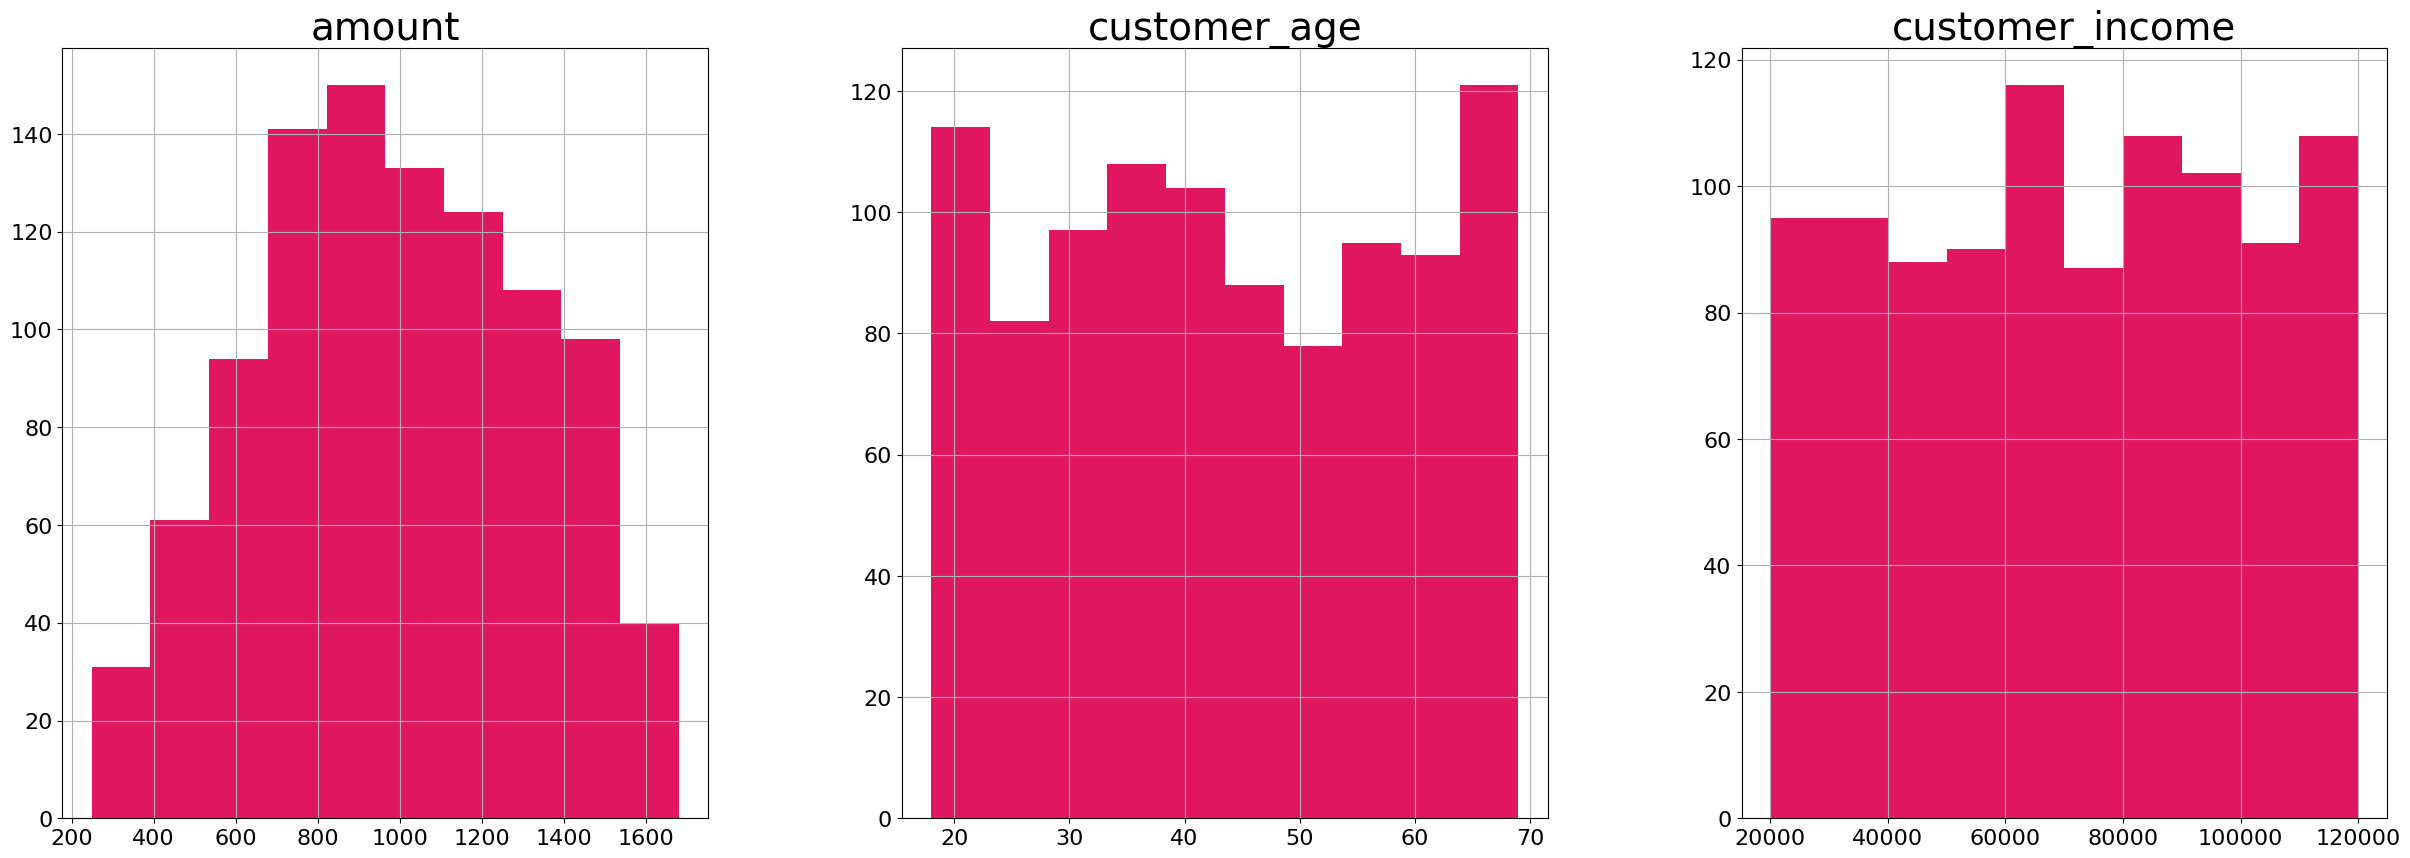

In [169]:
ax = df_transactions[NUMERICAL_COLUMNS].hist(bins = 10, 
                     figsize = (30,10), #width, height
                     color = '#e01760', layout=(1,3))

for axs in ax.flatten():
    axs.set_title(axs.get_title(), fontsize=28)  
    axs.set_xlabel(axs.get_xlabel(), fontsize=18)  
    axs.set_ylabel(axs.get_ylabel(), fontsize=18) 
    
    axs.tick_params(axis='x', labelsize=16)
    axs.tick_params(axis='y', labelsize=16)

plt.grid(True)
plt.show()

fig = ax[0][0].get_figure()
fig.savefig("../output/part1/numerical_hist.png")

Notes:

- The distribution of `amount` is approximately normal, with a mean of ~1000 and a standard deviation of ~300
- There is no apparent mode in the distribution of `customer_income`, indicating a lack of concentration in any particular value
- The distribution of `customer_age` is relatively flat, suggesting a uniform distribution across the observed range.

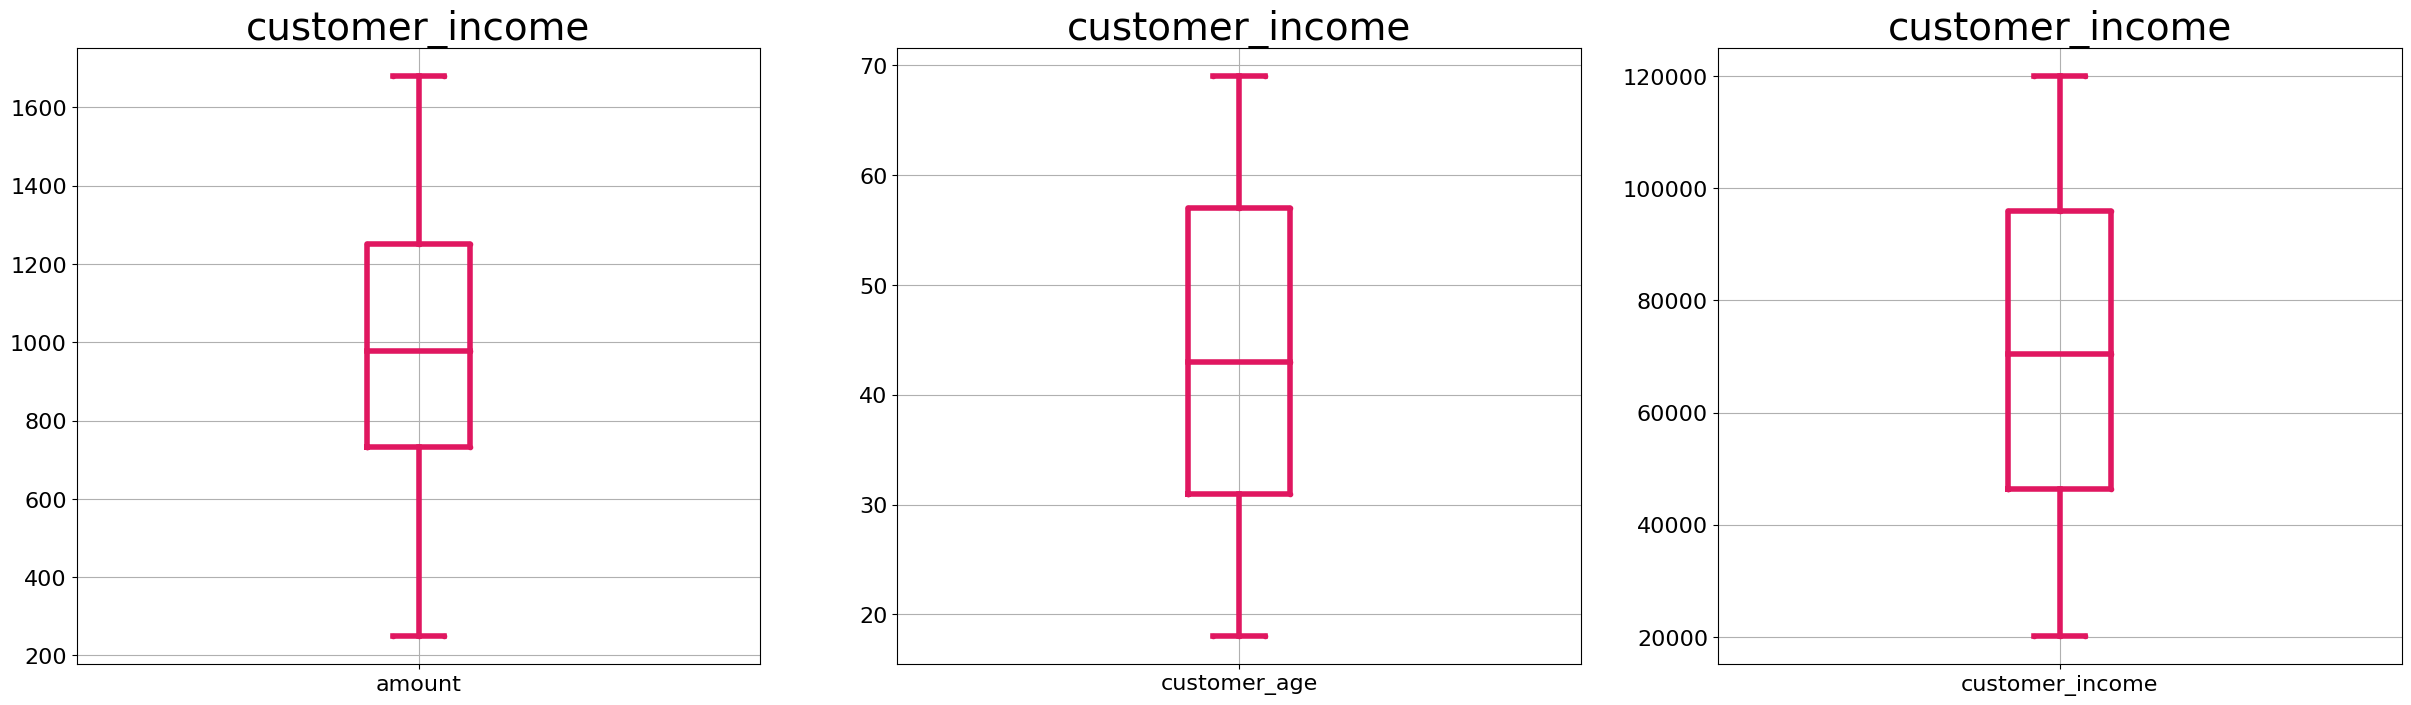

In [194]:
fig=plt.figure(figsize = (30,8))
for idx,col_ in enumerate(NUMERICAL_COLUMNS):
    ax=plt.subplot(1,len(NUMERICAL_COLUMNS),idx+1)
    if not col_ in df_stats.columns:
        continue
    box_props = dict(linestyle='-', linewidth=4, color=PINK_RGB)

    bp = df_transactions.boxplot(column=[col_], sym='.', color = '#e01760', boxprops=box_props, 
             flierprops=box_props,
             medianprops=box_props,
             whiskerprops=box_props,
             capprops=box_props,
             showfliers=False, grid=True, rot=0)
    
    #plt.axhline(y=df_stats.loc["Q1 - 1.5*IQR",col_], color='grey', linestyle="--", linewidth=2, label="hola")
    #plt.axhline(y=df_stats.loc["Q3 + 1.5*IQR",col_], color='grey', linestyle="--",  linewidth=2)
    
    ax.set_title(axs.get_title(), fontsize=28)  
    ax.set_xlabel(axs.get_xlabel(), fontsize=18)  
    ax.set_ylabel(axs.get_ylabel(), fontsize=18) 

    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
    
plt.show()
fig.savefig("../output/part1/numerical_boxplot.png")

Note: No outliers

###  Correlation matrix

In [203]:
type(fig[0][0])

matplotlib.axes._axes.Axes

<Figure size 2000x500 with 0 Axes>

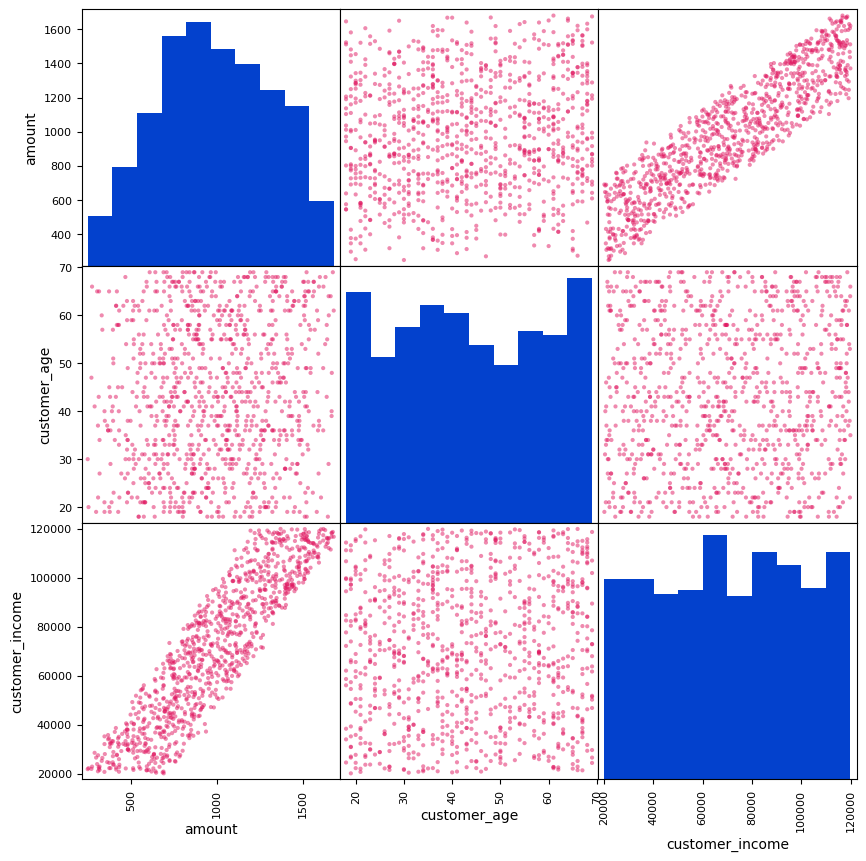

In [204]:


df = df_transactions[NUMERICAL_COLUMNS]
fig = plt.figure(figsize=(20,5))
axs=pd.plotting.scatter_matrix(df, figsize=(10, 10), color=PINK_RGB, hist_kwds={'color':MED_BLUE})
plt.show()
fig = axs[0][0].get_figure()

fig.savefig("../output/part1/numerical_hist_correlation.png")




## Time series for product_category and payment_method

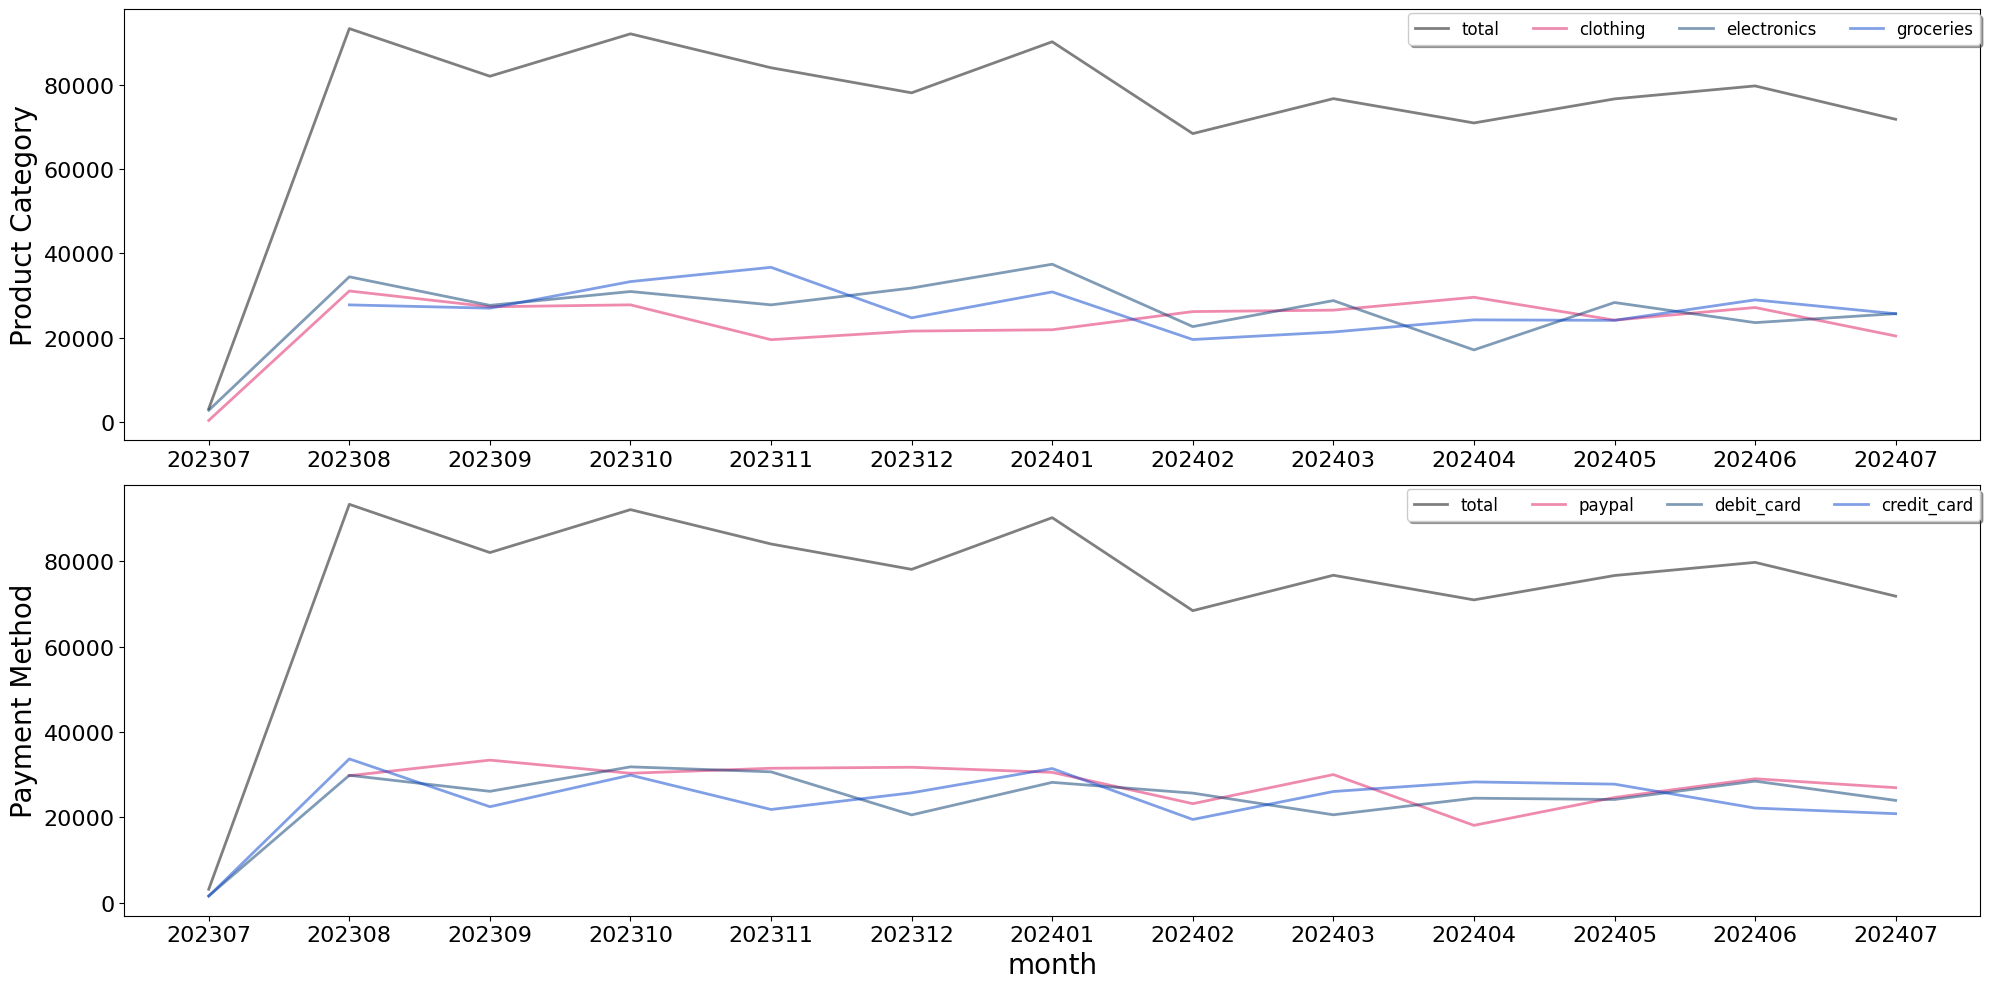

In [234]:
df_transactions["date"] = df_transactions["transaction_date"].apply(lambda dd: dd.strftime("%Y%m"))

df_g = pd.DataFrame({"amount_total" : df_transactions.groupby(["date"], as_index=True)["amount"].sum(),
                     "clothing" : df_transactions[df_transactions["product_category"]=="clothing"].groupby(["date"], as_index=True)["amount"].sum(),
                     "electronics" : df_transactions[df_transactions["product_category"]=="electronics"].groupby(["date"], as_index=True)["amount"].sum(),
                     "groceries" : df_transactions[df_transactions["product_category"]=="groceries"].groupby(["date"], as_index=True)["amount"].sum(),
                     "paypal" : df_transactions[df_transactions["payment_method"]=="paypal"].groupby(["date"], as_index=True)["amount"].sum(),
                     "debit_card" : df_transactions[df_transactions["payment_method"]=="debit_card"].groupby(["date"], as_index=True)["amount"].sum(),
                     "credit_card" : df_transactions[df_transactions["payment_method"]=="credit_card"].groupby(["date"], as_index=True)["amount"].sum()
                    })

df_g.reset_index(inplace=True)

dates = list(df_g["date"])
amount_total = list(df_g["amount_total"])
clothing_amount = list(df_g["clothing"])
electronics = list(df_g["electronics"])
groceries = list(df_g["groceries"])

paypal_amount = list(df_g["paypal"])
debit_card = list(df_g["debit_card"])
credit_card = list(df_g["credit_card"])

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(211)
plt.plot(dates,amount_total, "k", alpha=0.5, label="total", linewidth=2)
plt.plot(dates,clothing_amount, PINK_RGB, alpha=0.5, label="clothing", linewidth=2)
plt.plot(dates,electronics, DARK_BLUE,  alpha=0.5, label="electronics", linewidth=2)
plt.plot(dates,groceries, MED_BLUE,  alpha=0.5, label="groceries", linewidth=2)
plt.legend(bbox_to_anchor=(1, 0.99), loc=1, borderaxespad=0., fontsize="12", fancybox=True, shadow=True, ncol=5)


ax1.set_xlabel("", fontsize=20)  
ax1.set_ylabel("Product Category", fontsize=20)  
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2 = fig.add_subplot(212)
plt.plot(dates,amount_total, "k", alpha=0.5, label="total", linewidth=2)
plt.plot(dates,paypal_amount, PINK_RGB, alpha=0.5, label="paypal", linewidth=2)
plt.plot(dates,debit_card, DARK_BLUE,  alpha=0.5, label="debit_card", linewidth=2)
plt.plot(dates,credit_card, MED_BLUE,  alpha=0.5, label="credit_card", linewidth=2)
plt.legend(bbox_to_anchor=(1, 0.99), loc=1, borderaxespad=0., fontsize="12", fancybox=True, shadow=True, ncol=5)

ax2.set_xlabel("month", fontsize=20)  
ax2.set_ylabel("Payment Method", fontsize=20)  
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)


plt.tight_layout()
plt.show()

fig.savefig("../output/part1/time_series.png")


Note: `amount` does not change significantly with date.  

## Categorical

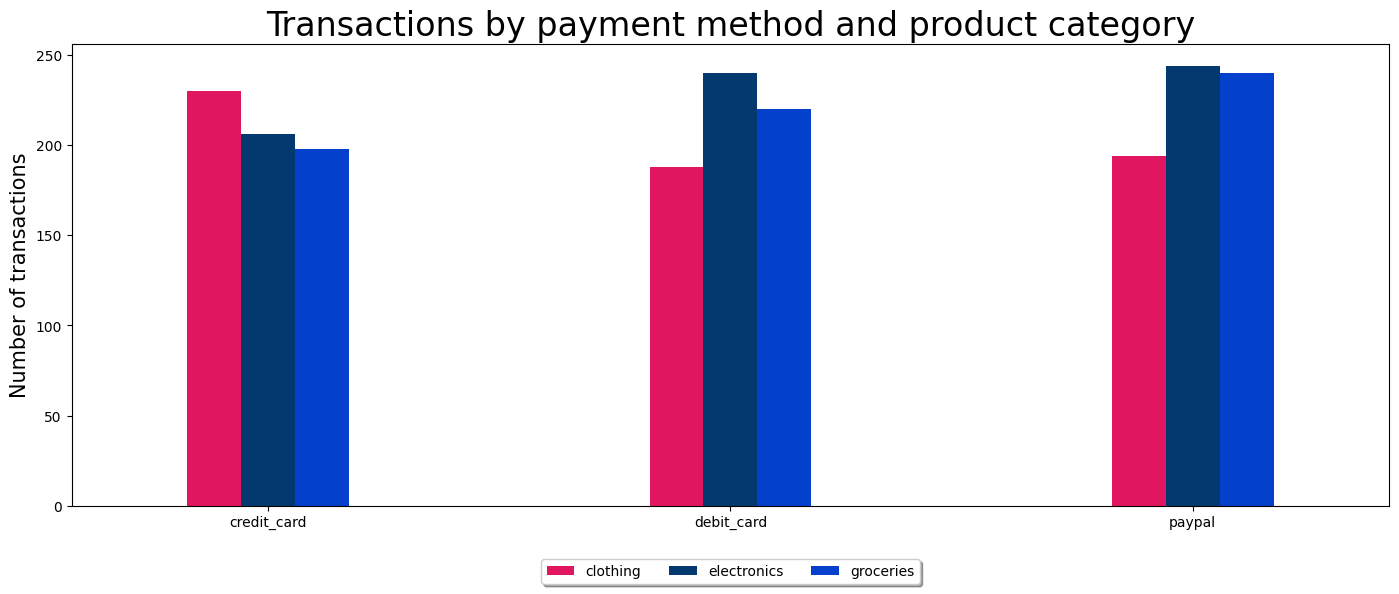

In [54]:
df_pivot = pd.pivot_table(df_transactions[CATEG_COLUMNS],
                          columns="product_category",
                          aggfunc=pd.Series.count, index="payment_method"
)

color_list = [PINK_RGB, DARK_BLUE, MED_BLUE]

width = .35 # width of a bar


# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar", color=color_list, width = width)
fig = ax.get_figure()
fig.set_size_inches(17, 6)
ax.set_xlabel("Payment Method")
ax.set_ylabel("Number of Transactions")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=5)

ax.set_title("Transactions by payment method and product category", fontsize=24)  
ax.set_xlabel(axs.get_xlabel(), fontsize=20)  
ax.set_ylabel("Number of transactions", fontsize=15)
plt.xticks(rotation=0)

plt.show()

fig.savefig("../output/part1/categ_barplot.png")

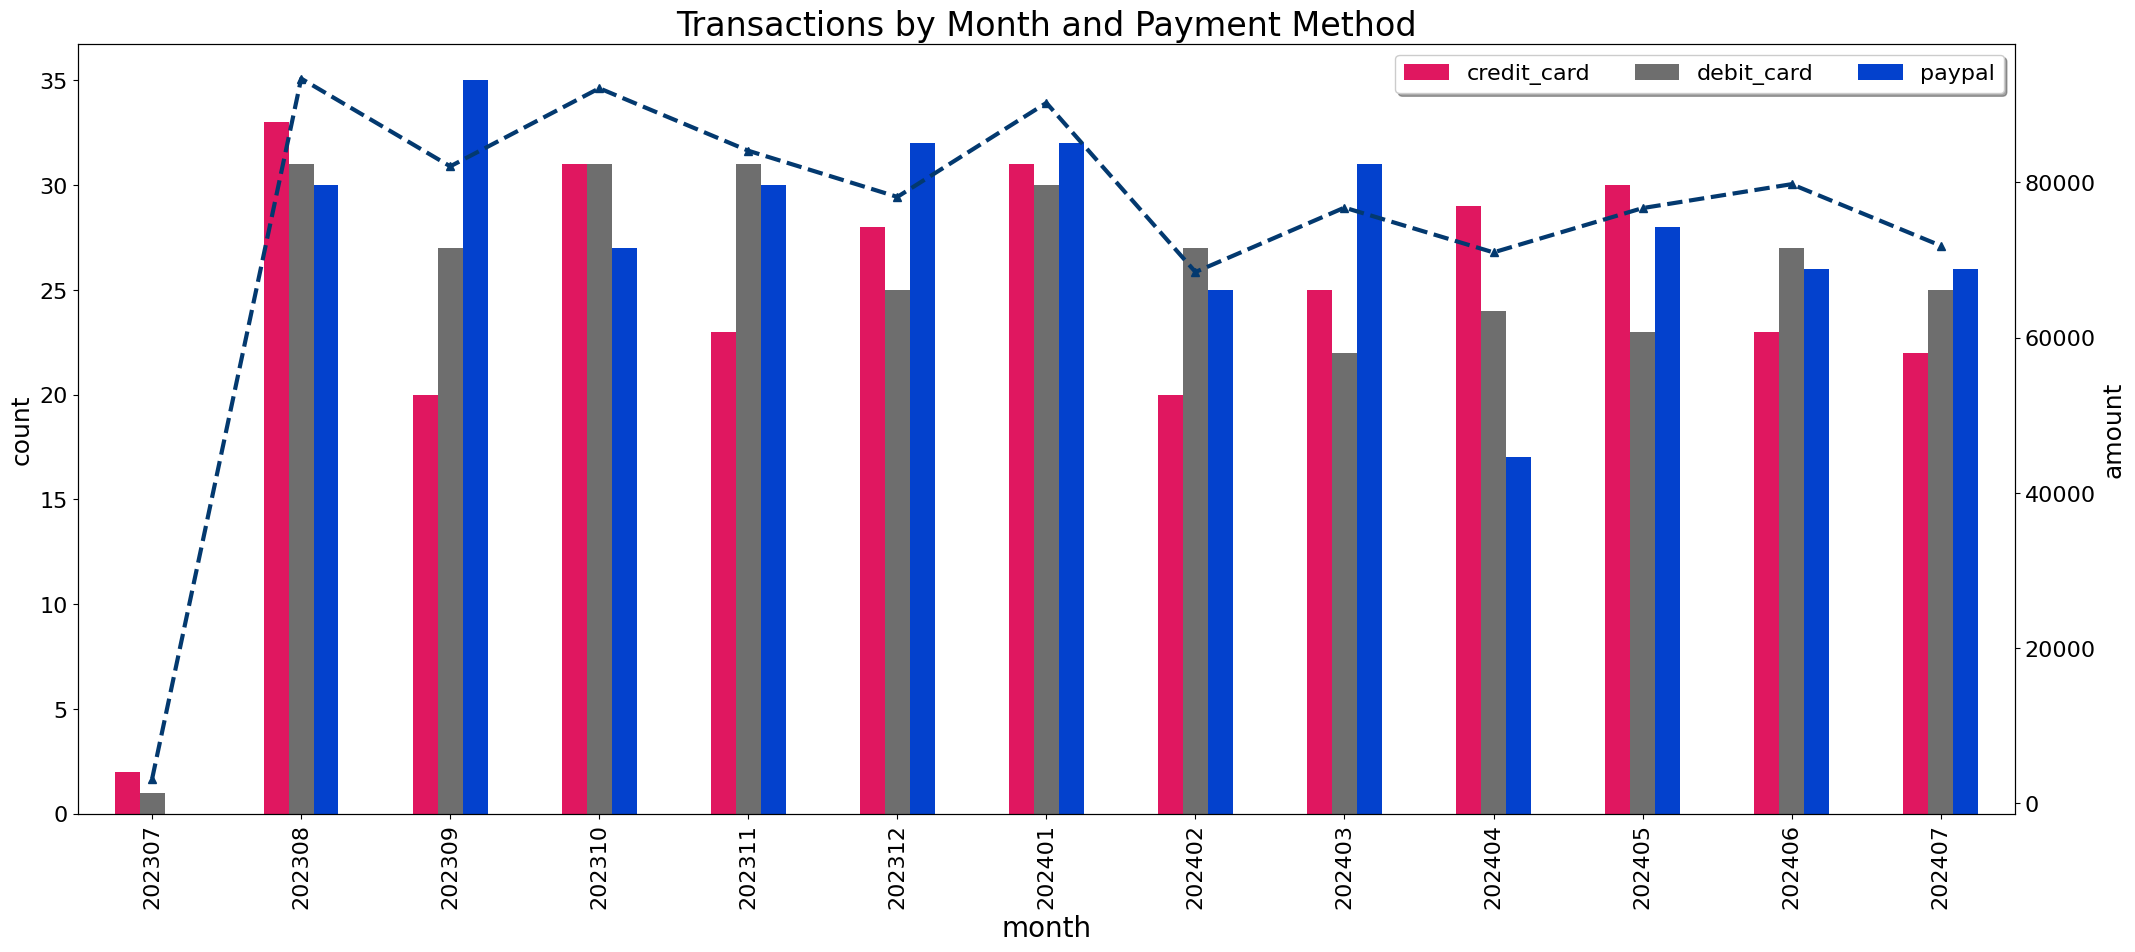

In [235]:
fig, ax1 = plt.subplots(figsize=(25,10))

df_transactions["month"] = df_transactions["transaction_date"].apply(lambda dd: dd.strftime("%Y%m"))

df_transactions.pivot_table(index='month', columns='payment_method', values="amount", aggfunc="count").plot(kind='bar', 
                                                                                                            ax=ax1,
                                                                                                            color=[PINK_RGB,
                                                                                                                   "#6e6e6e",
                                                                                                                   MED_BLUE
                                                                                                                  ]

                                                                                                       )
ax1.legend(fontsize="16", fancybox=True, shadow=True, ncol=5)
# Create secondary y-axis
ax2 = ax1.twinx()
df_transactions.groupby('month')['amount'].sum().plot(ax=ax2, color=DARK_BLUE, linestyle='--', 
                                                      marker='^', alpha=1, linewidth=3)


ax1.set_xlabel("month", fontsize=20)  
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)



# Set labels and title
ax1.set_ylabel('count', fontsize=18)  
ax2.set_ylabel('amount', fontsize=18)  
plt.title('Transactions by Month and Payment Method', fontsize=24)  
plt.show()


fig.savefig("../output/part1/transactions_month_payment.png")

# Generate deliverables

In [237]:
df_transactions[["customer_id", "transaction_id", "transaction_date", "amount",  "product_category", "payment_method"]].to_csv("../output/part1/transactions_cleaned.csv", index=False, sep=",")